Total Acceleration=Gravity+User Acceleration

The dataset contains various columns, but we'll focus on Acceleration_x, Acceleration_y, and Acceleration_z for this analysis.

Next, let's proceed with the calculations:

Velocity: We'll integrate the acceleration data to obtain velocity. For the integration, we'll need to know the time interval between each data point. Could you please provide this information?

Position: After getting the velocity, we'll integrate again to obtain the position.

Energy: Kinetic energy is given by 
�
�
=
1
2
�
�
2
KE= 
2
1
​
 mv 
2
 , where 
�
m is mass and 
�
v is the velocity. If we assume a constant mass, we can compute the kinetic energy for each data point based on the calculated velocity.

Dominant Frequencies: We'll perform a Fast Fourier Transform (FFT) on the acceleration data to find the dominant frequencies.

Could you please provide the time interval between each data sample?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from scipy.fftpack import fft


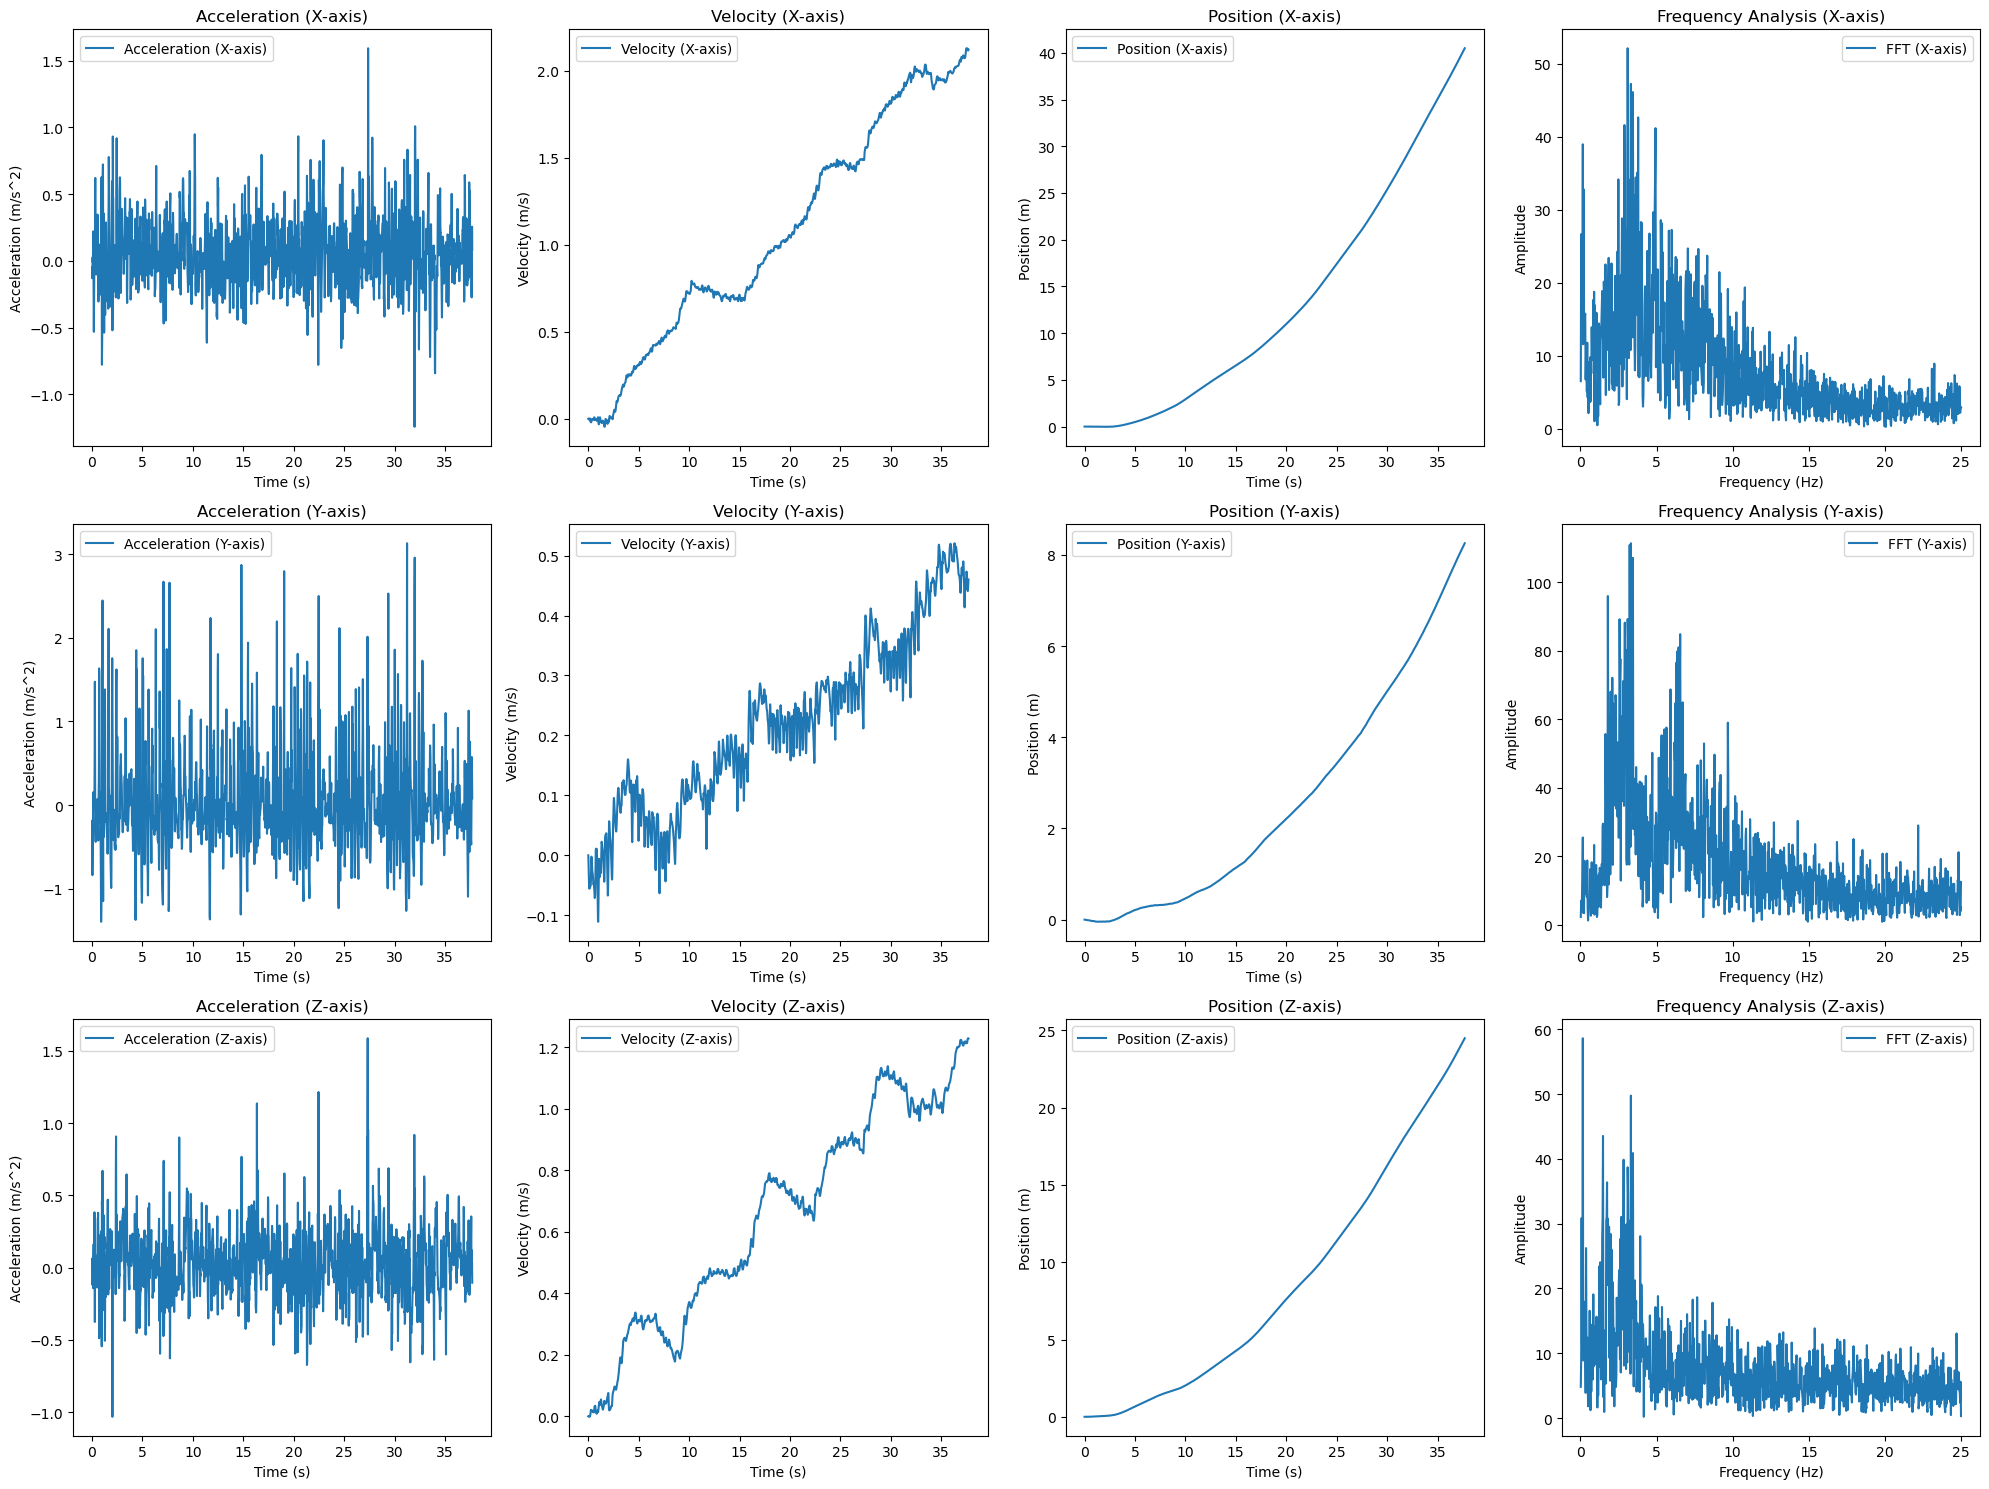

In [6]:

def plot_movement(file_path, sample_rate=50):
    df = pd.read_csv('./Motion/'+file_path)
    time = np.linspace(0, len(df)/sample_rate, len(df))

    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 rows for x, y, z axes and 4 columns for the four graphs
    
    for i, axis in enumerate(['x', 'y', 'z']):
        acceleration = df[f'userAcceleration.{axis}']
        velocity = cumtrapz(acceleration, dx=1/sample_rate, initial=0)
        position = cumtrapz(velocity, dx=1/sample_rate, initial=0)
        sp = np.fft.fft(acceleration)
        freq = np.fft.fftfreq(len(sp), 1 / sample_rate)
        
        data = [acceleration, velocity, position, sp]  # List of data for the four graphs
        titles = ['Acceleration', 'Velocity', 'Position', 'Frequency Analysis']
        ylabels = ['Acceleration (m/s^2)', 'Velocity (m/s)', 'Position (m)', 'Amplitude']
        
        for j in range(4):
            ax = axs[i, j]
            if j < 3:  # For Acceleration, Velocity, and Position
                ax.plot(time, data[j], label=f'{titles[j]} ({axis.upper()}-axis)')
                ax.set_xlabel('Time (s)')
            else:  # For Frequency Analysis
                ax.plot(freq[freq > 0], np.abs(data[j][freq > 0]), label=f'FFT ({axis.upper()}-axis)')
                ax.set_xlabel('Frequency (Hz)')
            ax.set_title(f'{titles[j]} ({axis.upper()}-axis)')
            ax.set_ylabel(ylabels[j])
            ax.legend()
    
    plt.tight_layout()
    plt.show()

# Run the function on the dataset
plot_movement('dws_1/sub_7.csv')